In [75]:
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

# Importing packages used to display images
from PIL import Image
import requests
from io import BytesIO

%matplotlib inline

In [11]:
raw_data = "https://raw.githubusercontent.com/ntlrs/Data620/master/Assigment2/soc-sign-bitcoinalpha.csv"

In [61]:
road = pd.read_csv(raw_data, header=None, names = ['SOURCE', 'TARGET', 'RATING', 'TIME'])

In [64]:
road.head()

,SOURCE,TARGET,RATING,TIME
0,7188,1,10,1407470400
1,430,1,10,1376539200
2,3134,1,10,1369713600
3,3026,1,10,1350014400
4,3010,1,10,1347854400


In [96]:
def _get_graph_file():
   G = nx.DiGraph()
   #Pass the file object to csv reader
   git = csv.reader(road,delimiter=',')

   #Ignore the headers
   headers = git.next()

   #Ignore the line between headers and actual data
   git.next()

   #git is the variable to be passed, not git_df
   G.add_weighted_edges_from(git.values)
   # to check if the number of edges are correct
   G.number_of_edges()
   return G

In [97]:
G=nx.from_pandas_edgelist(road,source="SOURCE",target="TARGET")

In [91]:
#for x in G.nodes():
      #print ("Node: ", x, " has total #degree: ",G.degree(x) )

In [98]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 3783
Number of edges: 14124
Average degree:   7.4671


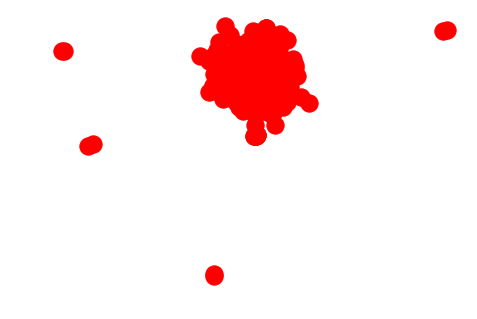

In [99]:
nx.draw(G)
plt.show(G)

In [92]:
#for u,v in G.edges():
      #print ("Weight of Edge ("+str(u)+","+str(v)+")", G.get_edge_data(u,v))

In [100]:
nx.is_connected(G)

False

In [102]:
G_list = list(nx.connected_component_subgraphs(G))
print("There are {0} subgraphs".format(len(G_list)))

x = 1
for i in G_list:
    print("----------------------------------")
    print("Summary details of sub-graph: {0} ".format(x))
    print("----------------------------------")
    x += 1
    print(nx.info(i))
    print("Diameter:{0}".format(nx.diameter(i)))
    print("Radius:{0}".format(nx.radius(i)))

There are 5 subgraphs
----------------------------------
Summary details of sub-graph: 1 
----------------------------------
Name: 
Type: Graph
Number of nodes: 3775
Number of edges: 14120
Average degree:   7.4808
Diameter:10
Radius:5
----------------------------------
Summary details of sub-graph: 2 
----------------------------------
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
Diameter:1
Radius:1
----------------------------------
Summary details of sub-graph: 3 
----------------------------------
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
Diameter:1
Radius:1
----------------------------------
Summary details of sub-graph: 4 
----------------------------------
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
Diameter:1
Radius:1
----------------------------------
Summary details of sub-graph: 5 
----------------------------------
Name: 
Type: Graph
Number of nodes: 2
Number of